# 프로젝트 : SRGAN 활용

## Step 1. 직접 고른 이미지로 SRGAN 실험하기

#### 높은해상도 이미지 불러오기

(680, 1180, 3)


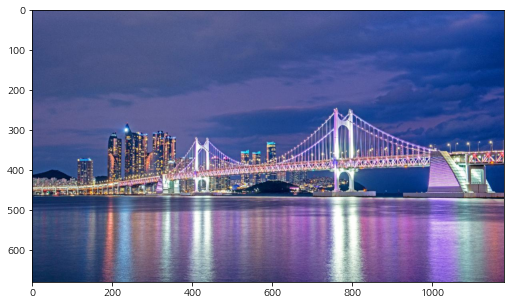

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

img_path = os.getenv('HOME')+'/aiffel/super_resolution/광안리.jpg' 
img_orig = cv2.imread(img_path) 
print (img_orig.shape)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(img_orig,cv2.COLOR_BGR2RGB))

In [2]:
def crop(image, left_top, x=200, y=200):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

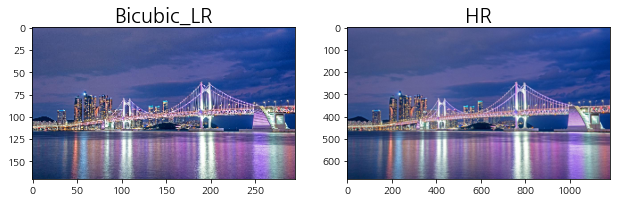

In [3]:
bicubic_image = cv2.resize(
    img_orig, 
    dsize=(img_orig.shape[1]//4, img_orig.shape[0]//4), # (가로 픽셀 수, 세로 픽셀 수)
    interpolation=cv2.INTER_CUBIC # bicubic interpolation 적용
)

images = [bicubic_image, img_orig]
titles = ["Bicubic_LR", "HR"]

plt.figure(figsize=(16,3))
for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title, fontsize=20)

In [4]:
import tensorflow as tf

model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

In [5]:
import tensorflow_datasets as tfds

def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

lr = bicubic_image

srgan_hr = apply_srgan(lr)

In [6]:
lr.shape

(170, 295, 3)

In [7]:
# bicubic interpolation 활용 고해상도 변환

bicubic_hr = cv2.resize(
    bicubic_image, 
    dsize= (bicubic_image.shape[1]*4, bicubic_image.shape[0]*4), # (가로 픽셀 수, 세로 픽셀 수)
    interpolation = cv2.INTER_CUBIC # bicubic interpolation 적용
)

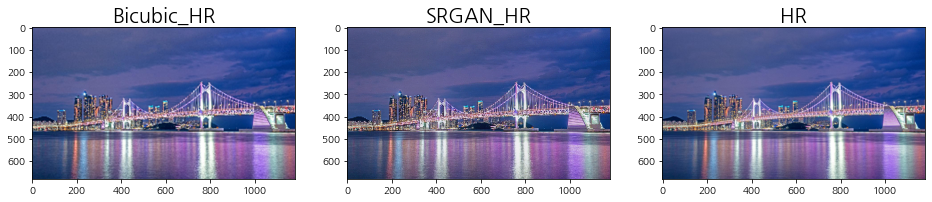

In [8]:
images = [bicubic_hr, srgan_hr, img_orig]
titles = ["Bicubic_HR", "SRGAN_HR", "HR"]

plt.figure(figsize=(16,3))
for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title, fontsize=20)

In [13]:
left_top = (900, 1100)
crop_bicubic_hr = crop(bicubic_hr, left_top)
crop_srgan_hr = crop(srgan_hr, left_top)
crop_img_orig = crop(img_orig, left_top)

crop_images = [crop_bicubic_hr, crop_srgan_hr, crop_img_orig]
titles = ["Bicubic_LR", "SRGAN_HR", "HR"]

plt.figure(figsize=(10,20))
for i, (image, title) in enumerate(zip(crop_images, titles)):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title, fontsize=20)

error: OpenCV(4.5.1) /tmp/pip-req-build-7m_g9lbm/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [12]:
print(img_orig.shape)
print(bicubic_hr.shape)
print(srgan_hr.shape)

(680, 1180, 3)
(680, 1180, 3)
(680, 1180, 3)


In [26]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

print("**동일 이미지 비교**")
print("Bicubic_HR PSNR :", peak_signal_noise_ratio(img_orig, bicubic_hr))
print("Bicubic_HR SSIM :", structural_similarity(img_orig, bicubic_hr, multichannel=True))
print("SRGAN_HR PSNR :", peak_signal_noise_ratio(img_orig, srgan_hr))
print("SRGAN_HR SSIM :", structural_similarity(img_orig, srgan_hr, multichannel=True))
print("HR PSNR :", peak_signal_noise_ratio(img_orig, img_orig))
print("HR SSIM :", structural_similarity(img_orig, img_orig, multichannel=True))

**동일 이미지 비교**


ValueError: Input images must have the same dimensions.

#### 저해상도 이미지 불러오기  


(218, 660, 3)


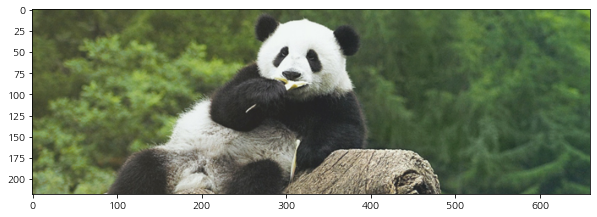

In [14]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

img_path = os.getenv('HOME')+'/aiffel/super_resolution/panda.jpg' 
img_orig = cv2.imread(img_path) 
print (img_orig.shape)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(img_orig,cv2.COLOR_BGR2RGB))

In [15]:
lr = img_orig

srgan_hr = apply_srgan(lr)

In [16]:
bicubic_hr = cv2.resize(
    img_orig, 
    dsize=(img_orig.shape[1]*4, img_orig.shape[0]*4), # (가로 픽셀 수, 세로 픽셀 수)
    interpolation=cv2.INTER_CUBIC # bicubic interpolation 적용
)

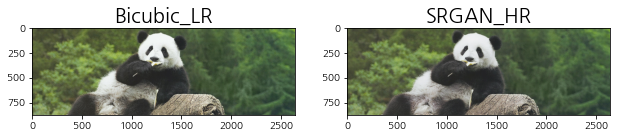

In [17]:
images = [bicubic_hr, srgan_hr]
titles = ["Bicubic_LR", "SRGAN_HR"]

plt.figure(figsize=(16,3))
for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title, fontsize=20)

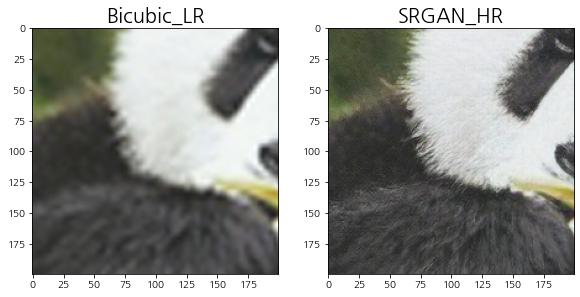

In [19]:
left_top = (200, 1000)
crop_bicubic_hr = crop(bicubic_hr, left_top)
crop_srgan_hr = crop(srgan_hr, left_top)
crop_img_orig = crop(img_orig, left_top)

crop_images = [crop_bicubic_hr, crop_srgan_hr]
titles = ["Bicubic_LR", "SRGAN_HR"]

plt.figure(figsize=(15,25))
for i, (image, title) in enumerate(zip(crop_images, titles)):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title, fontsize=20)

In [23]:
img_big = cv2.resize(img_orig, dsize = (2640, 872))

In [24]:
print(bicubic_hr.shape)
print(img_big.shape)
print(srgan_hr.shape)

(872, 2640, 3)
(872, 2640, 3)
(872, 2640, 3)


In [25]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

print("**동일 이미지 비교**")
print("Bicubic_HR PSNR :", peak_signal_noise_ratio(img_big, bicubic_hr))
print("Bicubic_HR SSIM :", structural_similarity(img_big, bicubic_hr, multichannel=True))
print("SRGAN_HR PSNR :", peak_signal_noise_ratio(img_big, srgan_hr))
print("SRGAN_HR SSIM :", structural_similarity(img_big, srgan_hr, multichannel=True))

**동일 이미지 비교**
Bicubic_HR PSNR : 41.48582291833603
Bicubic_HR SSIM : 0.9884659962674851
SRGAN_HR PSNR : 27.917539117057807
SRGAN_HR SSIM : 0.716979248805634


## Step 2. SRGAN을 이용해 고해상도 gif 생성하기

이전 Super Resolution의 활용 사례에 대해 살펴봤을 때, 단일 이미지가 아닌 영상에 대해 Super Resolution을 적용한 사례가 있었습니다. 이번에는 이미 학습된 SRGAN을 이용해 저해상도 영상을 고해상도 영상으로 바꿔보는 프로젝트를 수행해 봅시다.

실제로 동영상의 Super Resolution은 시간 순서에 따른 다수의 프레임 정보를 고려하는 것이 더 좋지만, 처음부터 학습시키기에 많은 시간이 소요됩니다. 여기서는 이전에 사용했던 SRGAN을 이용해 한 프레임씩 고해상도 이미지로 변환 시켜 모든 프레임에 대해 적용하고, 그 프레임들을 합쳐 동영상으로 만들어 봅시다.

각 프레임들을 모아 gif 파일을 만드는데 아래 라이브러리의 설치가 필요합니다.

### Step 2-1. gif 이미지 불러오기 

In [34]:
import cv2

# 다운받은 파일의 경로를 설정해 주세요.
gif = cv2.VideoCapture("/home/aiffel-dj48/aiffel/super_resolution/fire_lr.gif")

isTrue = True
frames = []
while isTrue:
    isTrue, frame = gif.read()
    if isTrue:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)

print("frame 수 :", len(frames))
print("frame 크기 :", (frames[0].shape))

frame 수 : 0


IndexError: list index out of range

### Step 2-2. 프레임별 Super Resolution 진행

### Step 2-3. 프레임을 합쳐 gif 만들기

In [ ]:
import imageio

imageio.mimsave("고해상도.gif", frames_sr)

### Step 2-4. Jupyter notebook에 gif표시하기

In [ ]:
from IPython.display import Image as show_gif

show_gif("저해상도.gif", width=800) # width 는 적당히 큰 값으로 설정해주세요

In [ ]:
show_gif("고해상도.gif", width=800) # 위에서 설정한 width와 같은 값으로 설정해주세요